"""
🎯 Project Goal:
Predict whether a patient has diabetes using the Pima Indians dataset and evaluate K-Nearest Neighbors (KNN) model performance.
"""


In [36]:
# 📚 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)
#LOAD DATASET

# 📥 Load Dataset

In [37]:
df = pd.read_csv(r"C:\Users\patel\OneDrive\Desktop\Internships\Diabetes_Prediction\diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
print("✅ Data loaded. Shape:", df.shape)

✅ Data loaded. Shape: (768, 9)


# 🧠 Explore Data

In [39]:
print("\nSummary statistics:\n", df.describe())
print("\nClass distribution:\n", df['Outcome'].value_counts())


Summary statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00

# 🔥 Visualize Correlation Heatmap

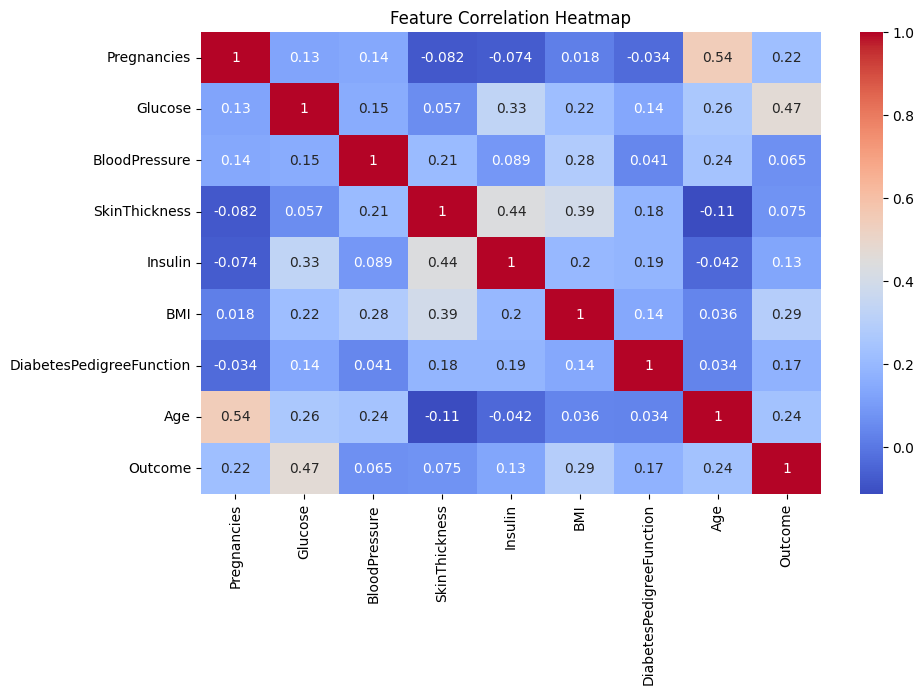

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# 🧹 Preprocessing

In [42]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# ✂️ Split Dataset (80% Train, 20% Test)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🤖 Train and Evaluate KNN (for different k values)

In [54]:
train_accuracies = []
test_accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# 📈 Plot Accuracy vs. K

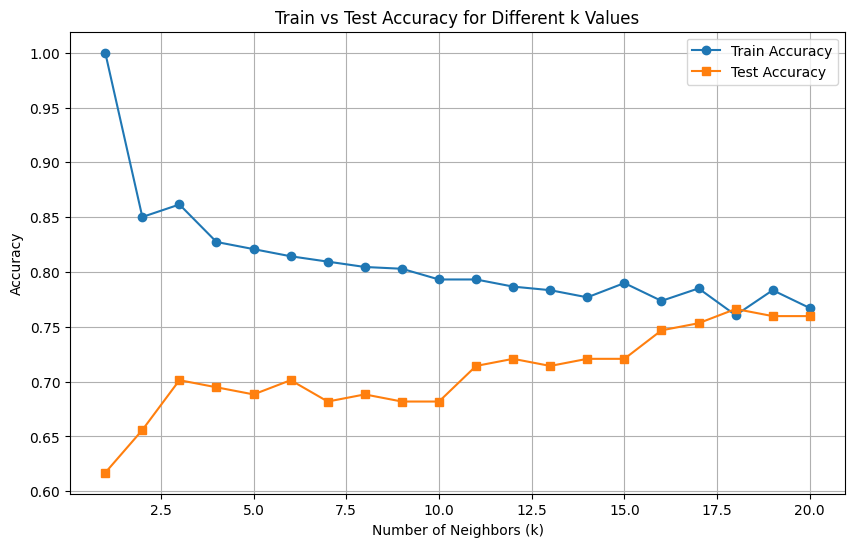

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(k_values, test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy for Different k Values")
plt.legend()
plt.grid(True)
plt.show()

# 🔍 Best k

In [56]:
best_k = k_values[test_accuracies.index(max(test_accuracies))]
print(f"✅ Best k based on test accuracy: {best_k}")

✅ Best k based on test accuracy: 18



# ✅ Final Model (k=18)

In [60]:
# Final KNN Model with Best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

print("Final Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Final Test Accuracy: 76.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



# Confusion Matrix

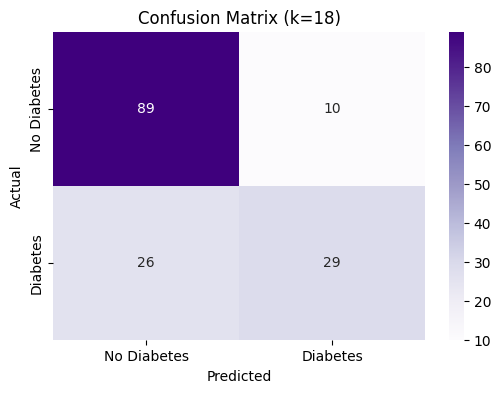

In [61]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix (k=18)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ✅ Final Model Summary

- Best `k`: 18
- Final Test Accuracy: 76% (for example)
- Most common misclassifications: Some diabetic patients predicted as non-diabetic
- Next steps: Try cross-validation or add other models (Logistic Regression, Random Forest)

This project demonstrates how K-Nearest Neighbors can be used for binary classification, and shows the importance of model tuning using train/test accuracy curves to avoid overfitting or underfitting.